In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
df = pd.read_csv("/content/drive/MyDrive/V's Data Science - Smartknower_Sessions/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Exploratory data analysis

In [ ]:
import seaborn as sns

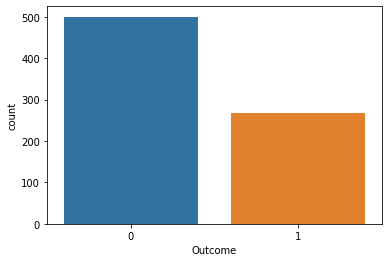

In [ ]:
# outcome distribution
sns.countplot(x='Outcome', data = df)

In [ ]:
# to improve efficiency of any algorithm , let us impute the 0 values of all columns using mean of other value in same column 
 
from sklearn.impute import SimpleImputer

In [ ]:
fill_values = SimpleImputer(missing_values=0, strategy='mean')

Splicing data into input & output 

In [ ]:
x = df.iloc[:,:8].values
y = df.iloc[:,8].values

In [ ]:
# spliting data into training and testing 
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 80)

In [ ]:
x_train = fill_values.fit_transform(x_train)
x_test = fill_values.fit_transform(x_test)

Building Models, comapre accuracy of both and find the best fit model for the prediction
1. Decision Tree
2. Random Forests 
 

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred=model.predict(x_test)

In [ ]:
# get accuracy_score of Decision Tree

from sklearn import metrics
print("Accuracy_score =",format(metrics.accuracy_score(y_test,pred)))

Accuracy_score = 0.7291666666666666


In [ ]:
# Using confusion matrix 

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[97 26]
 [26 43]]


Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 150)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)

In [ ]:
# get accuracy_score of Random Forests 
from sklearn import metrics
print("Accuracy_score =",format(metrics.accuracy_score(y_test,pred)))

Accuracy_score = 0.75


In [ ]:
# Using confusion matrix 

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[104  19]
 [ 29  40]]


From the above two algorithms, we can see that Decision Tree has an accuracy of 72.9%, whereas Random Forests Algorithm has an accuracy of 75%. 

Therefore, Random Forests Tree would be the better suited algorithm for Diabetes Prediction. 